In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("../../data/peo_2005_beta.csv")

In [3]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [4]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

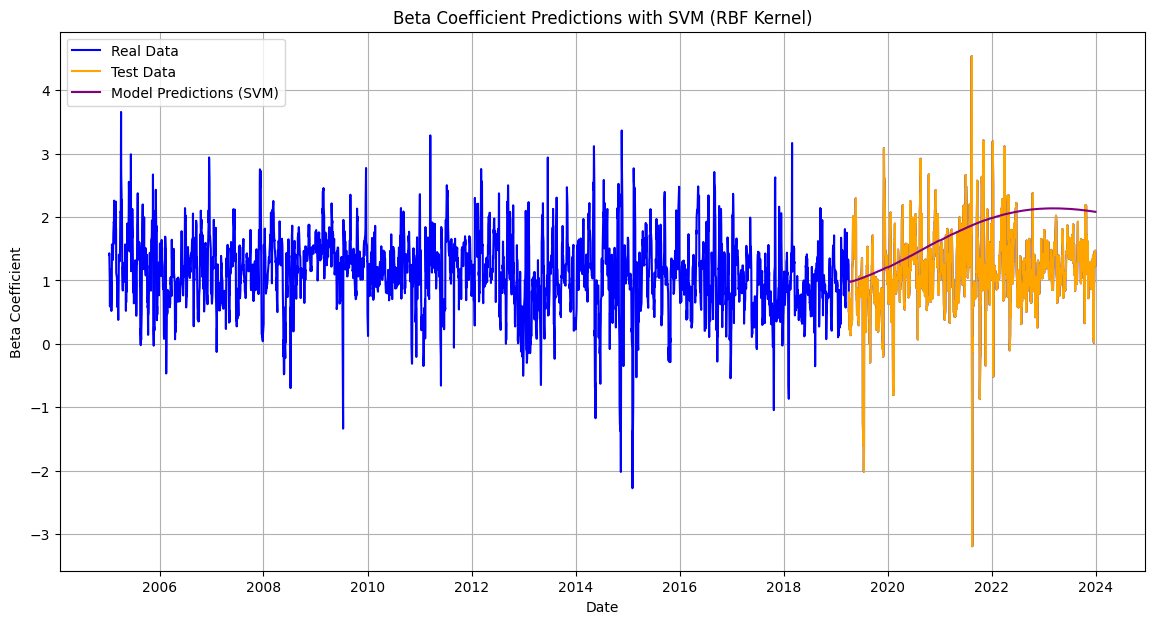

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data['Data'], y, label='Real Data', color='blue', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], y_test, label='Test Data', color='orange', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], predictions_svm, label='Model Predictions (SVM)', color='purple', linewidth=1.5)
plt.title('Beta Coefficient Predictions with SVM (RBF Kernel)')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
mse_svm = mean_squared_error(y_test, predictions_svm)
mae_svm = mean_absolute_error(y_test, predictions_svm)
rmse_svm = mean_squared_error(y_test, predictions_svm, squared=False)
r2_svm = r2_score(y_test, predictions_svm)

print("Mean Absolute Error (MAE) for SVM (RBF Kernel):", mae_svm)
print("Squared Mean Absolute Error (RMSE) for SVM (RBF Kernel):", rmse_svm)
print("R-squared (R2) for SVM (RBF Kernel):", r2_svm)

Mean Absolute Error (MAE) for SVM (RBF Kernel): 0.7079262650247387
Squared Mean Absolute Error (RMSE) for SVM (RBF Kernel): 0.8580587273352092
R-squared (R2) for SVM (RBF Kernel): -0.9820405084751649
